# Loading Libraries Needed

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

# Loading Dataset, Doing Preprocessing

In [6]:
games = pd.read_csv('tic-tac-toe.data', header=None)
games.columns = ['tl', 'tm', 'tr', 'ml', 'mm', 'mr', 'bl', 'bm', 'br', 'result']
games.head()

,tl,tm,tr,ml,mm,mr,bl,bm,br,result
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [7]:
games_int = games.replace(['b', 'o', 'x'], [0, 1, 2])
games_int.head()

,tl,tm,tr,ml,mm,mr,bl,bm,br,result
0,2,2,2,2,1,1,2,1,1,positive
1,2,2,2,2,1,1,1,2,1,positive
2,2,2,2,2,1,1,1,1,2,positive
3,2,2,2,2,1,1,1,0,0,positive
4,2,2,2,2,1,1,0,1,0,positive


# First Configuration: Using the whole dataset

Here, we use all the columns for the training and testing sets.

Results are pretty bad, because winning conditions should be easy to see, and a coded result-detector would surely do better (it should have 100% accuracy), but these are pretty understandable because each square is seen more as a property, than a whole 3x3 grid.

## Split Data

In [8]:
def split(x, y, test_prop):
    t_size = test_prop
    return train_test_split(x, y, test_size=t_size, random_state=0)

In [9]:
X1 = games_int[['tl', 'tm', 'tr', 'ml', 'mm', 'mr', 'bl', 'bm', 'br']].values
Y1 = games_int['result']

t1_x_train, t1_x_test, t1_y_train, t1_y_test = split(X1, Y1, 0.4)

## Naive Bayes

In [10]:
def conduct_nb(X_train, X_test, y_train, y_test):
    nb_clf = GaussianNB()
    nb_clf.fit(X_train, y_train)
    nb_acc = nb_clf.score(X_test, y_test)
    
    print('Accuracy for Naive Bayes:', round(nb_acc, 4))
    return nb_clf

In [11]:
nb_model1 = conduct_nb(t1_x_train, t1_x_test, t1_y_train, t1_y_test)

Accuracy for Naive Bayes: 0.724


## KNN

In [12]:
def conduct_knn(X_train, X_test, y_train, y_test):
    best_k = 0
    knn_acc = 0

    for k in range(1,11):    # you can choose other values for k
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train, y_train)
        acc = knn_clf.score(X_test, y_test)

        if acc > knn_acc:
            best_k = k
            knn_acc = acc

    print('Accuracy for Nearest Neighbors (k={0}): {1:.4f}'.format(best_k, knn_acc))
    return knn_clf

In [13]:
knn_model1 = conduct_knn(t1_x_train, t1_x_test, t1_y_train, t1_y_test)

Accuracy for Nearest Neighbors (k=6): 0.8281


C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Gather Predictions

In [14]:
def gather_prediction(model, X_test, y_test):
    y_pred = model.predict(X_test)
    sample = games.loc[:, ['mm', 'bm']]
    test = pd.DataFrame(y_test)

    test.columns = ['result']
    test['prediction'] = y_pred

    return sample.join(test, how='inner')

In [17]:
comparison_nb1 = gather_prediction(nb_model1, t1_x_test, t1_y_test)
comparison_nb1

,mm,bm,result,prediction
1,o,x,positive,negative
2,o,o,positive,positive
5,o,b,positive,positive
8,o,o,positive,positive
10,b,b,positive,positive
...,...,...,...,...
951,x,o,negative,positive
952,o,o,negative,positive
954,x,o,negative,positive
955,o,o,negative,negative


In [18]:
comparison_knn1 = gather_prediction(knn_model1, t1_x_test, t1_y_test)
comparison_knn1

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,mm,bm,result,prediction
1,o,x,positive,positive
2,o,o,positive,positive
5,o,b,positive,positive
8,o,o,positive,positive
10,b,b,positive,positive
...,...,...,...,...
951,x,o,negative,negative
952,o,o,negative,negative
954,x,o,negative,negative
955,o,o,negative,negative


## Confusion Matrices

In [19]:
def plot_confusion_matrix(model, X_test, y_test):
    """Generates and plots a confusion matrix, given a model."""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=games_int.result)
    disp.plot(cmap='BuPu')
    plt.show()
    
    print('Confusion Matrix for Naive Bayes:')
    plot_confusion_matrix(nb_clf)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (958).

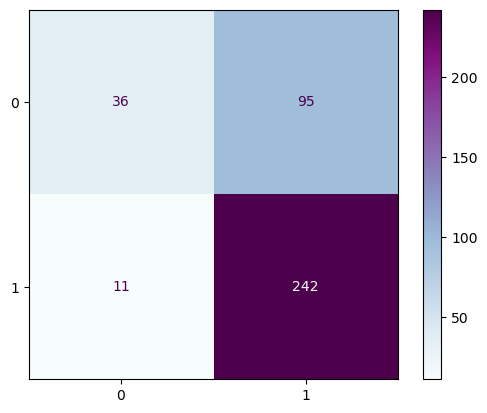

In [20]:
plot_confusion_matrix(nb_model1, t1_x_test, t1_y_test)

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (958).

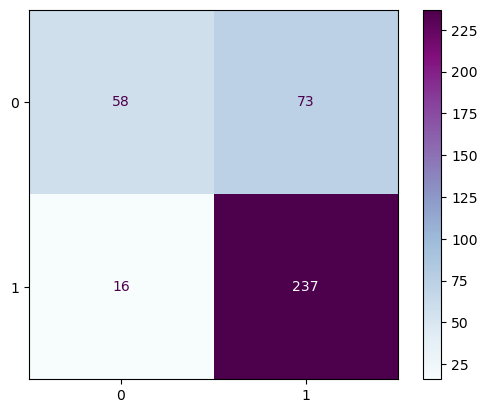

In [21]:
plot_confusion_matrix(knn_model1, t1_x_test, t1_y_test)

## Evaluation Metrics

In [22]:
def compute_stats(dataframe):
    tn = sum((dataframe.result == 'negative') & (dataframe.prediction == 'negative'))
    tp = sum((dataframe.result == 'positive') & (dataframe.prediction == 'positive'))
    fn = sum((dataframe.result == 'positive') & (dataframe.prediction == 'negative'))
    fp = sum((dataframe.result == 'negative') & (dataframe.prediction == 'positive'))
    
    return [tn, tp, fn, fp]

def compute_precision(tp, fp):
    return (tp)/(tp+fp)

def compute_recall(tp, fn):
    return (tp)/(tp+fn)

def compute_specificity(tn, fp):
    return (tn)/(tn+fp)

In [23]:
stats_nb1 = compute_stats(comparison_nb1)
stats_nb1

[36, 242, 11, 95]

In [24]:
stats_knn1 = compute_stats(comparison_knn1)
stats_knn1

[58, 237, 16, 73]

### Precision

In [25]:
compute_precision(stats_nb1[1], stats_nb1[3])

0.7181008902077152

In [27]:
compute_precision(stats_knn1[1], stats_knn1[3])

0.7645161290322581

### Recall

In [28]:
compute_recall(stats_nb1[1], stats_nb1[2])

0.9565217391304348

In [29]:
compute_recall(stats_knn1[1], stats_knn1[2])

0.9367588932806324

### Specificity

In [30]:
compute_specificity(stats_nb1[0], stats_nb1[3])

0.2748091603053435

In [31]:
compute_specificity(stats_knn1[0], stats_knn1[3])

0.44274809160305345

## Predict Specific Case

In [32]:
def predict_specific(model, array):
    return model.predict([array])

In [33]:
predict_specific(nb_model1, [0,0,0,0,2,0,0,1,0])

array(['positive'], dtype='<U8')

In [34]:
predict_specific(knn_model1, [0,0,0,0,2,0,0,1,0])

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['positive'], dtype=object)

# Second Configuration: Using only two columns as features

## Split Data

In [35]:
X2 = games_int[['mm', 'bm']].values
Y2 = games_int['result']

t2_x_train, t2_x_test, t2_y_train, t2_y_test = split(X2, Y2, 0.4)

## Naive Bayes

In [36]:
nb_model2 = conduct_nb(t2_x_train, t2_x_test, t2_y_train, t2_y_test)

Accuracy for Naive Bayes: 0.6406


## KNN

In [37]:
knn_model2 = conduct_knn(t2_x_train, t2_x_test, t2_y_train, t2_y_test)

Accuracy for Nearest Neighbors (k=4): 0.6849


C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Gather Predictions

In [38]:
comparison_nb2 = gather_prediction(nb_model2, t2_x_test, t2_y_test)
comparison_nb2

,mm,bm,result,prediction
1,o,x,positive,positive
2,o,o,positive,positive
5,o,b,positive,positive
8,o,o,positive,positive
10,b,b,positive,positive
...,...,...,...,...
951,x,o,negative,positive
952,o,o,negative,positive
954,x,o,negative,positive
955,o,o,negative,positive


In [39]:
comparison_knn2 = gather_prediction(knn_model2, t2_x_test, t2_y_test)
comparison_knn2

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,mm,bm,result,prediction
1,o,x,positive,negative
2,o,o,positive,negative
5,o,b,positive,positive
8,o,o,positive,negative
10,b,b,positive,positive
...,...,...,...,...
951,x,o,negative,positive
952,o,o,negative,negative
954,x,o,negative,positive
955,o,o,negative,negative


### Get Valid 'Boards': columns must only have one x and one o

In [40]:
def get_valid_board(df):
    return df[(
        ((df.mm == 'x') & (df.bm == 'o')) 
        |
        ((df.mm == 'o') & (df.bm == 'x'))
    )]

In [41]:
comparison_nb2_valid = get_valid_board(comparison_nb2)
comparison_nb2_valid

,mm,bm,result,prediction
1,o,x,positive,positive
12,x,o,positive,positive
14,x,o,positive,positive
18,x,o,positive,positive
20,x,o,positive,positive
...,...,...,...,...
947,o,x,negative,positive
949,o,x,negative,positive
951,x,o,negative,positive
954,x,o,negative,positive


In [42]:
comparison_knn2_valid = get_valid_board(comparison_knn2)
comparison_knn2_valid

,mm,bm,result,prediction
1,o,x,positive,negative
12,x,o,positive,positive
14,x,o,positive,positive
18,x,o,positive,positive
20,x,o,positive,positive
...,...,...,...,...
947,o,x,negative,negative
949,o,x,negative,negative
951,x,o,negative,positive
954,x,o,negative,positive


## Confusion Matrices

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (958).

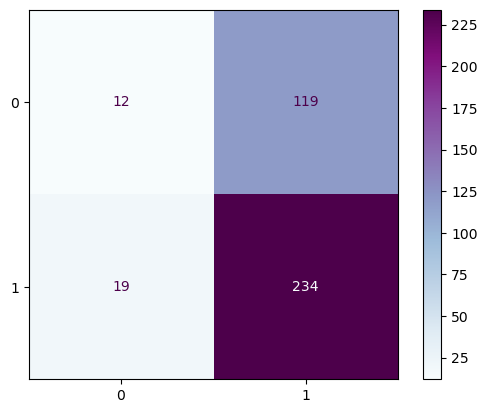

In [43]:
plot_confusion_matrix(nb_model2, t2_x_test, t2_y_test)

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (958).

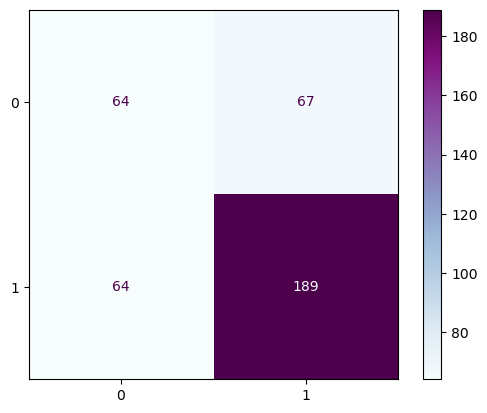

In [44]:
plot_confusion_matrix(knn_model2, t2_x_test, t2_y_test)

## Evaluation Metrics

In [45]:
stats_nb2 = compute_stats(comparison_nb2)
stats_nb2

[12, 234, 19, 119]

In [46]:
stats_nb2_valid = compute_stats(comparison_nb2_valid)
stats_nb2_valid

[0, 88, 0, 49]

In [47]:
stats_knn2 = compute_stats(comparison_knn2)
stats_knn2

[64, 189, 64, 67]

In [48]:
stats_knn2_valid = compute_stats(comparison_knn2_valid)
stats_knn2_valid

[39, 61, 27, 10]

### Precision

In [49]:
compute_precision(stats_nb2[1], stats_nb2[3])

0.6628895184135978

In [50]:
compute_precision(stats_nb2_valid[1], stats_nb2_valid[3])

0.6423357664233577

In [51]:
compute_precision(stats_knn2[1], stats_knn2[3])

0.73828125

In [52]:
compute_precision(stats_knn2_valid[1], stats_knn2_valid[3])

0.8591549295774648

### Recall

In [53]:
compute_recall(stats_nb2[1], stats_nb2[2])

0.924901185770751

In [54]:
compute_recall(stats_nb2_valid[1], stats_nb2_valid[2])

1.0

In [55]:
compute_recall(stats_knn2[1], stats_knn2[2])

0.7470355731225297

In [56]:
compute_recall(stats_knn2_valid[1], stats_knn2_valid[2])

0.6931818181818182

### Specificity

In [57]:
compute_specificity(stats_nb2[0], stats_nb2[3])

0.0916030534351145

In [58]:
compute_specificity(stats_nb2_valid[0], stats_nb2_valid[3])

0.0

In [59]:
compute_specificity(stats_knn2[0], stats_knn2[3])

0.48854961832061067

In [60]:
compute_specificity(stats_knn2_valid[0], stats_knn2_valid[3])

0.7959183673469388

## Predict Specific Case

In [62]:
predict_specific(nb_model2, [2,1])

array(['positive'], dtype='<U8')

In [63]:
predict_specific(knn_model2, [2,1])

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['positive'], dtype=object)

# Third Configuration: Downsampling positive results

Here, we use downsampling because of the much higher number of positive (626) vs negative (332) results.
This difference is realistic, as the first player does have a higher chance of winning in tic-tac-toe compared to the second; but it may have led the model to mostly predict positive results.

## Downsampling

In [64]:
pos_result = games_int[games_int['result'] == 'positive']
pos_result

,tl,tm,tr,ml,mm,mr,bl,bm,br,result
0,2,2,2,2,1,1,2,1,1,positive
1,2,2,2,2,1,1,1,2,1,positive
2,2,2,2,2,1,1,1,1,2,positive
3,2,2,2,2,1,1,1,0,0,positive
4,2,2,2,2,1,1,0,1,0,positive
...,...,...,...,...,...,...,...,...,...,...
621,0,0,0,2,2,2,1,0,1,positive
622,0,0,0,2,2,2,0,1,1,positive
623,0,0,0,1,1,0,2,2,2,positive
624,0,0,0,1,0,1,2,2,2,positive


In [65]:
pos_resampled = resample(pos_result, n_samples=332, random_state=36)
pos_resampled

,tl,tm,tr,ml,mm,mr,bl,bm,br,result
610,0,0,1,2,2,2,1,1,2,positive
161,2,1,1,2,1,0,2,2,0,positive
250,2,0,1,2,1,1,2,0,2,positive
293,2,0,0,0,2,1,0,1,2,positive
439,1,0,2,1,1,2,2,0,2,positive
...,...,...,...,...,...,...,...,...,...,...
532,0,1,2,2,1,2,1,0,2,positive
352,1,2,0,1,2,1,2,2,0,positive
72,2,2,2,0,0,1,1,0,0,positive
326,1,2,1,2,2,0,1,2,0,positive


In [66]:
neg_result = games_int[games_int['result'] == 'negative']

In [67]:
games_downsample = pd.concat([pos_resampled, neg_result])
games_downsample

,tl,tm,tr,ml,mm,mr,bl,bm,br,result
610,0,0,1,2,2,2,1,1,2,positive
161,2,1,1,2,1,0,2,2,0,positive
250,2,0,1,2,1,1,2,0,2,positive
293,2,0,0,0,2,1,0,1,2,positive
439,1,0,2,1,1,2,2,0,2,positive
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2,negative
954,1,2,1,2,2,1,2,1,2,negative
955,1,2,1,2,1,2,2,1,2,negative
956,1,2,1,1,2,2,2,1,2,negative


## Split Data

In [68]:
X3 = games_downsample[['tl', 'tm', 'tr', 'ml', 'mm', 'mr', 'bl', 'bm', 'br']].values
Y3 = games_downsample['result']

t3_x_train, t3_x_test, t3_y_train, t3_y_test = split(X3, Y3, 0.4)

## Naive Bayes

In [69]:
nb_model3 = conduct_nb(t3_x_train, t3_x_test, t3_y_train, t3_y_test)

Accuracy for Naive Bayes: 0.609


## KNN

In [70]:
knn_model3 = conduct_knn(t3_x_train, t3_x_test, t3_y_train, t3_y_test)

Accuracy for Nearest Neighbors (k=3): 0.7782


C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Gather Predictions

In [71]:
comparison_nb3 = gather_prediction(nb_model3, t3_x_test, t3_y_test)
comparison_nb3

,mm,bm,result,prediction
0,o,o,positive,negative
4,o,o,positive,negative
11,b,o,positive,negative
23,o,o,positive,negative
25,o,o,positive,negative
...,...,...,...,...
951,x,o,negative,negative
952,o,o,negative,negative
953,o,x,negative,negative
955,o,o,negative,negative


In [72]:
comparison_knn3 = gather_prediction(knn_model3, t3_x_test, t3_y_test)
comparison_knn3

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,mm,bm,result,prediction
0,o,o,positive,positive
4,o,o,positive,positive
11,b,o,positive,negative
23,o,o,positive,positive
25,o,o,positive,negative
...,...,...,...,...
951,x,o,negative,negative
952,o,o,negative,negative
953,o,x,negative,negative
955,o,o,negative,negative


### Get Valid 'Boards': columns must only have one x and one o

In [73]:
comparison_nb3_valid = get_valid_board(comparison_nb3)
comparison_nb3_valid

,mm,bm,result,prediction
64,o,x,positive,negative
112,x,o,positive,positive
124,x,o,positive,positive
124,x,o,positive,positive
148,x,o,positive,positive
...,...,...,...,...
913,x,o,negative,positive
938,o,x,negative,negative
951,x,o,negative,negative
953,o,x,negative,negative


In [74]:
comparison_knn3_valid = get_valid_board(comparison_knn3)
comparison_knn3_valid

,mm,bm,result,prediction
64,o,x,positive,positive
112,x,o,positive,negative
124,x,o,positive,positive
124,x,o,positive,positive
148,x,o,positive,positive
...,...,...,...,...
913,x,o,negative,positive
938,o,x,negative,negative
951,x,o,negative,negative
953,o,x,negative,negative


## Confusion Matrices

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (958).

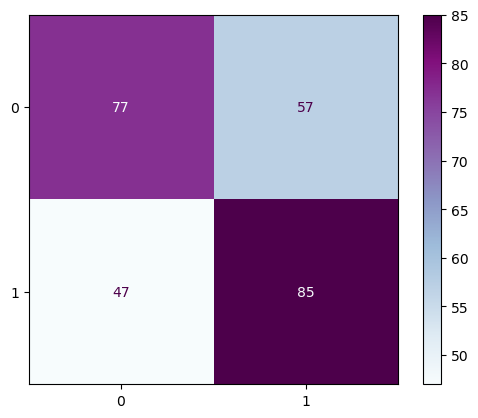

In [75]:
plot_confusion_matrix(nb_model3, t3_x_test, t3_y_test)

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (958).

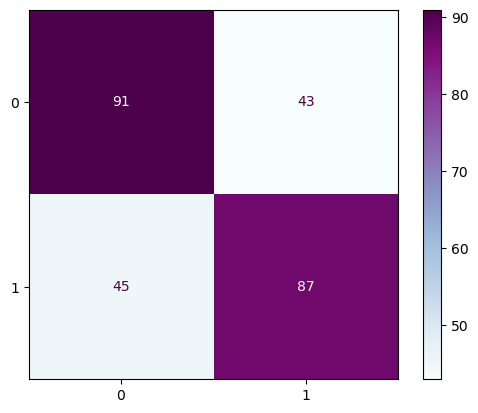

In [76]:
plot_confusion_matrix(knn_model3, t3_x_test, t3_y_test)

## Evaluation Metrics

In [77]:
stats_nb3 = compute_stats(comparison_nb3)
stats_nb3

[77, 85, 47, 57]

In [78]:
stats_nb3_valid = compute_stats(comparison_nb3_valid)
stats_nb3_valid

[33, 24, 14, 16]

In [79]:
stats_knn3 = compute_stats(comparison_knn3)
stats_knn3

[91, 87, 45, 43]

In [80]:
stats_knn3_valid = compute_stats(comparison_knn3_valid)
stats_knn3_valid

[32, 22, 16, 17]

### Precision

In [81]:
compute_precision(stats_nb3[1], stats_nb3[3])

0.5985915492957746

In [82]:
compute_precision(stats_nb3_valid[1], stats_nb3_valid[3])

0.6

In [83]:
compute_precision(stats_knn3[1], stats_knn3[3])

0.6692307692307692

In [84]:
compute_precision(stats_knn3_valid[1], stats_knn3_valid[3])

0.5641025641025641

### Recall

In [85]:
compute_recall(stats_nb3[1], stats_nb3[2])

0.6439393939393939

In [86]:
compute_recall(stats_nb3_valid[1], stats_nb3_valid[2])

0.631578947368421

In [87]:
compute_recall(stats_knn3[1], stats_knn3[2])

0.6590909090909091

In [88]:
compute_recall(stats_knn3_valid[1], stats_knn3_valid[2])

0.5789473684210527

### Specificity

In [89]:
compute_specificity(stats_nb3[0], stats_nb3[3])

0.5746268656716418

In [90]:
compute_specificity(stats_nb3_valid[0], stats_nb3_valid[3])

0.673469387755102

In [91]:
compute_specificity(stats_knn3[0], stats_knn3[3])

0.6791044776119403

In [92]:
compute_specificity(stats_knn3_valid[0], stats_knn3_valid[3])

0.6530612244897959

## Predict Specfic Case

In [93]:
predict_specific(nb_model3, [0,0,0,0,2,0,0,1,0])

array(['positive'], dtype='<U8')

In [94]:
predict_specific(knn_model3, [0,0,0,0,2,0,0,1,0])

C:\Users\neilb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['negative'], dtype=object)